In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

In [2]:
from sklearn.metrics import mean_sqaured_error

ImportError: cannot import name 'mean_sqaured_error' from 'sklearn.metrics' (C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

In [3]:
df=pd.read_csv('daily-min-temperatures.xls',parse_dates=['Date'],index_col='Date')

In [4]:
X=df.values
print('Shape of data \t',df.shape)
print('Original Dataset: \n',df.head())
print('After Extracting only temperatures:\n',X)

Shape of data 	 (3650, 1)
Original Dataset: 
             Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
After Extracting only temperatures:
 [[20.7]
 [17.9]
 [18.8]
 ...
 [13.5]
 [15.7]
 [13. ]]


<Axes: xlabel='Date'>

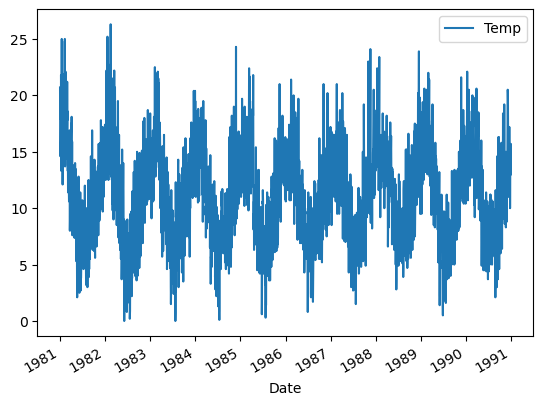

In [5]:
df.plot()

<Axes: xlabel='Date'>

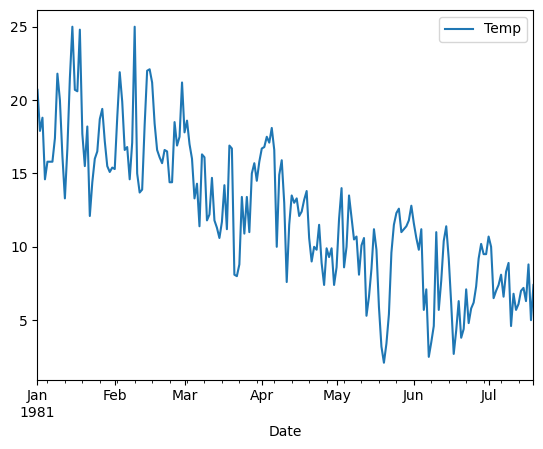

In [6]:
df[:200].plot()

In [7]:
# We have to apply ADF on dataset to identify if its stationary or not.

from statsmodels.tsa.stattools import adfuller

dftest=adfuller(df['Temp'],autolag='AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ",dftest[1])
print("3. Num Of Lags : ",dftest[2])
print("4. Num Of Obseravtions Used for ADF Regression and critical values Calculation : ", dftest[3])
print("5. Critical Values : ",)
for key, val in dftest[4].items():
      print("\t",key, ": ", val)

1. ADF :  -4.444804924611688
2. P-Value :  0.0002470826300361109
3. Num Of Lags :  20
4. Num Of Obseravtions Used for ADF Regression and critical values Calculation :  3629
5. Critical Values : 
	 1% :  -3.4321532327220154
	 5% :  -2.862336767636517
	 10% :  -2.56719413172842


In [8]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

pacf=plot_pacf(df['Temp'].lags=25)
acf=plot_acf(df['Temp'].lags=25)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (2971903103.py, line 3)

In [9]:
train=X[:len(X)-7]
test=X[len(X)-7:]

In [10]:
model=AutoReg(train,lags=10)

In [11]:
model_fit=model.fit()
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3643
Model:                    AutoReg(10)   Log Likelihood               -8375.514
Method:               Conditional MLE   S.D. of innovations              2.427
Date:                Wed, 19 Mar 2025   AIC                          16775.028
Time:                        05:06:44   BIC                          16849.402
Sample:                            10   HQIC                         16801.521
                                 3643                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9350      0.142      6.603      0.000       0.657       1.213
y.L1           0.6103      0.017     36.795      0.000       0.578       0.643
y.L2          -0.0832      0.019     -4.289      0.0

In [12]:
print(len(train))

3643


In [13]:
print(len(test))

7


In [14]:
pred=model_fit.predict(start=len(train), end=len(train)+len(test)-1,dynamic=False)

In [15]:
test.shape

(7, 1)

In [16]:
pred.shape

(7,)

In [17]:
from sklearn.metrics import mean_squared_error

rmse=np.sqrt(mean_squared_error(test, pred))

In [18]:
print(rmse)

1.5638196220860707


In [19]:
pred_future=model_fit.predict(start=len(X), end=len(X)+6, dynamic=False)

print("The future prediction for the next week")
print(pred_future)
print("Number of Predictions Made:", len(pred_future))

The future prediction for the next week
[12.36671014 12.28608804 12.20309536 12.24915916 12.30618875 12.31199689
 12.27225975]
Number of Predictions Made: 7
